In [ ]:
import pandas as pd
import numpy as np

# 1. Charger le fichier original
df = pd.read_csv('paddydataset.csv', sep=',', encoding='utf-8', low_memory=False)

# 2. Fonction pour appliquer le bruit
def add_noise(df, uppercase_prob=0.10, missing_prob=0.05):
    df_noisy = df.copy()

    # Pour chaque colonne de type string (textuelle)
    for col in df_noisy.select_dtypes(include=['object']).columns:
        # Appliquer aléatoirement la majuscule sur 10% des valeurs (par exemple)
        mask = np.random.rand(len(df_noisy)) < uppercase_prob
        df_noisy.loc[mask, col] = df_noisy.loc[mask, col].str.upper()

    # Pour toutes les colonnes (numériques et textuelles) : supprimer aléatoirement 5% des valeurs
    for col in df_noisy.columns:
        mask = np.random.rand(len(df_noisy)) < missing_prob
        df_noisy.loc[mask, col] = np.nan  # ou '' si vous préférez une chaîne vide

    return df_noisy

# 3. Appliquer le bruit
noisy_df = add_noise(df, uppercase_prob=0.10, missing_prob=0.08)

# 4. Enregistrer dans un nouveau fichier
noisy_df.to_csv('noisy_paddydataset.csv', index=False, encoding='utf-8')

print("Le dataset noisy a été enregistré avec succès dans : noisy_paddydataset.csv")
print(f"Nombre de lignes : {len(noisy_df)}")
print(f"Pourcentage de valeurs manquantes total : {noisy_df.isna().mean().mean():.2%}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

sns.set_palette("husl")

---
# 1. EDA (Exploratory Data Analysis)
---

## 1.1 Chargement des données

In [ ]:
import pandas as pd

# Chemin relatif depuis le dossier racine du projet
df = pd.read_csv("/content/noisy_paddydataset.csv")


print("="*60)
print("APERÇU GÉNÉRAL DU DATASET")
print("="*60)
print(f"Dimensions du dataset: {df.shape}")
print(f"Nombre total de cellules: {df.shape[0] * df.shape[1]:,}")
print(df.head())
print("="*60)
print("APERÇU GÉNÉRAL DU DATASET")
print("="*60)
print(f"Dimensions du dataset: {df.shape}")
print(f"Nombre total de cellules: {df.shape[0] * df.shape[1]:,}")


In [ ]:
# Informations générales
print("INFORMATIONS GÉNÉRALES:")
print("-" * 30)
df.info()
print()

In [ ]:
# Statistiques descriptives de base
print("STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES:")
print("-" * 50)
print(df.describe())

## 1.2 Division des variables numériques et catégoriques

In [ ]:
# ----------------------------------------------------------------
# 3. DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES
# ----------------------------------------------------------------

print("\n" + "-"*70)
print("DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES")
print("-"*70)

# Identification des types de variables
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numériques: {len(numeric_features)}")
print(f"  Exemples: {numeric_features[:10]}")
print(f"\nVariables catégoriques: {len(categorical_features)}")
print(f"  Exemples: {categorical_features[:10]}")


## 1.3 Vérification des valeurs manquantes

In [ ]:
# ================================================================
# 2. ANALYSE DES DONNÉES MANQUANTES
# ================================================================

print("\n" + "="*60)
print("ANALYSE DES DONNÉES MANQUANTES")
print("="*60)

In [ ]:
# Calcul des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonnes': missing_data.index,
    'Valeurs_Manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
}).sort_values('Pourcentage', ascending=False)

In [ ]:
# Affichage des colonnes avec des valeurs manquantes
missing_cols = missing_df[missing_df['Valeurs_Manquantes'] > 0]
print(f"Nombre de colonnes avec des valeurs manquantes: {len(missing_cols)}")
print("\nColonnes avec le plus de valeurs manquantes:")
print(missing_cols.head(10))

In [ ]:
# Visualisation des données manquantes
plt.figure(figsize=(15, 8))
missing_cols_top = missing_cols.head(15)
plt.barh(missing_cols_top['Colonnes'], missing_cols_top['Pourcentage'])
plt.xlabel('Pourcentage de valeurs manquantes')
plt.title('Top 15 des colonnes avec des valeurs manquantes')
plt.gca().invert_yaxis()


In [ ]:
# Heatmap des valeurs manquantes (échantillon)
sample_cols = missing_cols.head(10)['Colonnes'].tolist()
if sample_cols:
    sns.heatmap(df[sample_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Heatmap des valeurs manquantes\n(Top 10 colonnes)')
plt.tight_layout()
plt.show()

# **2. Data Cleaning / Data Preprocessing**

---



2.1 Visualisation : Histogrammes avec Mean & Median

In [ ]:
# Créer une grille d'histogrammes (max 3 par ligne)
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[col].dropna()

    sns.histplot(data, kde=True, stat="density", alpha=0.7, color='skyblue', linewidth=0)

    mean_val = data.mean()
    median_val = data.median()

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Médiane: {median_val:.2f}')

    skewness = stats.skew(data)
    plt.title(f'{col}\\nSkewness: {skewness:.2f}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Densité')
    plt.legend(fontsize=9)

plt.tight_layout()
plt.suptitle('Distributions des Variables Numériques (avec Moyenne & Médiane)', fontsize=16, y=1.02)
plt.show()

2.2 Tests Statistiques & Suggestion d'Imputation

In [ ]:
# Analyse statistique pour chaque colonne numérique
imputation_suggestions = []

for col in numeric_features:
    data = df[col].dropna()
    n = len(data)

    if n < 3:
        continue  # Pas assez de données pour les tests

    mean = data.mean()
    median = data.median()
    skewness = stats.skew(data)
    kurt = stats.kurtosis(data)

    # Test de normalité selon taille d'échantillon
    if n <= 500:
        # Shapiro-Wilk (p-value > 0.05 → normal)
        shapiro_stat, shapiro_p = stats.shapiro(data)
        test_name = 'Shapiro-Wilk'
        p_value = shapiro_p
    elif n <= 5000:
        # Kolmogorov-Smirnov (données standardisées)
        standardized_data = (data - mean) / data.std()
        ks_stat, ks_p = stats.kstest(standardized_data, 'norm')
        test_name = 'Kolmogorov-Smirnov'
        p_value = ks_p
    else:
        # Trop grand dataset → on se fie à skewness
        p_value = np.nan
        test_name = 'N/A'

    # Décision d'imputation
    if abs(skewness) <= 0.5 and (np.isnan(p_value) or p_value > 0.05):
        imputation = "Moyenne (distribution symétrique et normale)"
    else:
        imputation = "Médiane (distribution asymétrique ou non normale)"

    imputation_suggestions.append({
        'Colonne': col,
        'Moyenne': round(mean, 2),
        'Médiane': round(median, 2),
        'Skewness': round(skewness, 3),
        'Test Normalité': test_name,
        'p-value': round(p_value, 4) if not np.isnan(p_value) else 'N/A',
        'Suggestion Imputation': imputation
    })

# Affichage des résultats
results_df = pd.DataFrame(imputation_suggestions)
results_df = results_df.sort_values(by='Skewness', key=abs, ascending=False)

print("RÉSUMÉ STATISTIQUE ET SUGGESTIONS D'IMPUTATION")
print("="*80)
print(results_df.to_string(index=False))

2.3 Application de l'Imputation Recommandée

In [ ]:
# Imputation automatique selon les suggestions
for col in numeric_features:
    data = df[col]
    if data.isnull().sum() == 0:
        continue  # Rien à imputer

    # Récupérer la suggestion
    suggestion = results_df.loc[results_df['Colonne'] == col, 'Suggestion Imputation'].values[0]

    if "Moyenne" in suggestion:
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"{col} : imputé par la MOYENNE")
    else:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"{col} : imputé par la MÉDIANE")

# Vérification finale
print(f"\nValeurs manquantes restantes (numériques) : {df[numeric_features].isnull().sum().sum()}")

2.4 Détection des Outliers

In [ ]:
# Après imputation des valeurs aberrantes
from scipy.stats.mstats import winsorize

def auto_treat_outliers(df, numeric_features, min_rows_threshold=5000, plot=True):
    """
    Traite automatiquement les outliers en choisissant la méthode la plus adéquate.

    Critères de décision :
    - Si très peu d'outliers (<1%) et dataset grand → Suppression possible
    - Si skewness > 1 et valeurs >=0 → Transformation log
    - Si % outliers > 5% → Capping percentiles 5%/95%
    - Sinon → Robust IQR + remplacement par médiane
    """

    summary = []
    rows_to_drop = set()
    initial_rows = len(df)

    # 🔹 Sauvegarde des données AVANT traitement (pour visualisation)
    df_before = df.copy()

    print("TRAITEMENT AUTOMATIQUE DES OUTLIERS - CHOIX INTELLIGENT PAR COLONNE")
    print("=" * 100)

    # ============================
    # TRAITEMENT COLONNE PAR COLONNE
    # ============================
    for col in numeric_features:
        data = df[col].dropna()

        if len(data) < 10:
            summary.append({
                'Colonne': col,
                'Méthode Choisie': 'Ignoré (trop peu de données)'
            })
            continue

        # Statistiques
        skewness = stats.skew(data)
        median = data.median()

        # Détection IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_mask = (df[col] < lower) | (df[col] > upper)
        nb_outliers = outlier_mask.sum()
        percent_outliers = nb_outliers / len(df) * 100

        method_chosen = ""
        action = ""

        # ============================
        # DÉCISION AUTOMATIQUE
        # ============================
        if nb_outliers == 0:
            method_chosen = "Aucun outlier"
            action = "Rien à faire"

        elif percent_outliers < 1 and len(df) > min_rows_threshold:
            rows_to_drop.update(df.loc[outlier_mask].index)
            method_chosen = "Suppression"
            action = f"{nb_outliers} lignes supprimées"

        elif abs(skewness) > 1 and data.min() >= 0:
            df[col + "_log"] = np.log1p(df[col])
            method_chosen = "Transformation log"
            action = "Nouvelle colonne _log créée"

        elif percent_outliers > 5:
            df[col] = winsorize(df[col], limits=[0.05, 0.05])
            method_chosen = "Capping (5%/95%)"
            action = "Winsorization appliquée"

        else:
            df.loc[outlier_mask, col] = median
            method_chosen = "Robust IQR + médiane"
            action = f"{nb_outliers} outliers remplacés par médiane"

        summary.append({
            'Colonne': col,
            'Skewness': round(skewness, 3),
            '% Outliers': round(percent_outliers, 2),
            'Méthode Choisie': method_chosen,
            'Action': action
        })

    # ============================
    # SUPPRESSION FINALE (UNE FOIS)
    # ============================
    if rows_to_drop:
        df.drop(index=list(rows_to_drop), inplace=True)
        df.reset_index(drop=True, inplace=True)
        df_before = df_before.loc[df.index].reset_index(drop=True)

    # ============================
    # VISUALISATION AVANT / APRÈS
    # ============================
    if plot:
        fig, axes = plt.subplots(
            nrows=len(numeric_features),
            ncols=2,
            figsize=(14, 4 * len(numeric_features))
        )

        if len(numeric_features) == 1:
            axes = np.array([axes])

        for i, col in enumerate(numeric_features):
            sns.boxplot(
                y=df_before[col],
                ax=axes[i, 0],
                color='lightcoral'
            )
            axes[i, 0].set_title(f'Avant - {col}')

            sns.boxplot(
                y=df[col],
                ax=axes[i, 1],
                color='lightgreen'
            )
            axes[i, 1].set_title(f'Après - {col}')

        plt.suptitle("Comparaison AVANT / APRÈS par colonne", fontsize=16)
        plt.tight_layout()
        plt.show()

    # ============================
    # RÉCAPITULATIF
    # ============================
    final_rows = len(df)
    print(f"\nNombre de lignes : {initial_rows} → {final_rows}")

    summary_df = pd.DataFrame(summary)
    print("\nRÉCAPITULATIF DU TRAITEMENT AUTOMATIQUE")
    print(summary_df.to_string(index=False))

    return df, summary_df

In [ ]:
df_original = df.copy()
df, recap = auto_treat_outliers(df, numeric_features, plot=True)


print("\n=== DATAFRAME APRÈS TRAITEMENT ===")
display(df)

In [ ]:
print("\n=== RÉCAPITULATIF ===")
display(recap)

2.5 Imputation des Valeurs Manquantes & Uniformisation des Variables Catégorielles

In [ ]:
# ===================================================================
# 2.5 Imputation + Uniformisation des Variables Catégorielles
# ===================================================================

print("ÉTAT AVANT TRAITEMENT")
print("="*80)
for col in categorical_features:
    if col in df.columns:
        missing = df[col].isnull().sum()
        uniques = df[col].nunique()
        print(f"{col:30} → {missing:3} valeurs manquantes | {uniques} valeurs uniques")

print("\n" + "="*80)
print("TRAITEMENT : IMPUTATION (mode) + UNIFORMISATION (minuscules + strip)")
print("="*80)

treatment_summary = []

for col in categorical_features:
    if col not in df.columns:
        print(f"⚠️ {col} : colonne non présente")
        continue

    initial_missing = df[col].isnull().sum()
    initial_unique = df[col].nunique()

    # 1. Imputation des valeurs manquantes par le mode
    if initial_missing > 0:
        mode_value = df[col].mode(dropna=True)[0]
        df[col].fillna(mode_value, inplace=True)
        imputed = True
    else:
        mode_value = None
        imputed = False

    # 2. Uniformisation : minuscules + suppression espaces
    df[col] = df[col].astype(str).str.lower().str.strip()

    # Après traitement
    final_missing = df[col].isnull().sum()
    final_unique = df[col].nunique()

    print(f"✓ {col}")
    if imputed:
        print(f"   → {initial_missing} valeurs manquantes imputées par mode : '{mode_value}'")
    print(f"   → Valeurs uniques : {initial_unique} → {final_unique} (réduction des doublons de casse)")

    treatment_summary.append({
        'Colonne': col,
        'Manquantes Initiales': initial_missing,
        'Imputé par Mode': mode_value if imputed else 'Non',
        'Uniques Avant': initial_unique,
        'Uniques Après': final_unique
    })

# Vérification finale
print("\n" + "="*80)
print("VÉRIFICATION FINALE")
print("="*80)
total_missing_cat = df[categorical_features].isnull().sum().sum()
print(f"Valeurs manquantes restantes (catégorielles) : {total_missing_cat} → doit être 0")

print("\nValeurs uniques finales par colonne :")
for col in categorical_features:
    if col in df.columns:
        print(f"   {col:30} → {df[col].nunique()} valeurs : {sorted(df[col].unique())[:10]}...")

# Tableau récapitulatif
summary_df = pd.DataFrame(treatment_summary)
print("\nRÉCAPITULATIF DU TRAITEMENT")
print(summary_df.to_string(index=False))

In [ ]:
print("Dataset après preprocessing:")
print("="*80)
# Affichage du dataset après preprocessing
df.head()

In [ ]:
# Chemin du fichier de sortie (tu peux changer le nom si tu veux)
cleaned_file_path = 'cleaned_paddydataset.csv'

# Enregistrement du DataFrame nettoyé (df est ton DataFrame après cleaning)
df.to_csv(cleaned_file_path, index=False, encoding='utf-8')

print(f"Dataset nettoyé enregistré avec succès !")
print(f"Fichier : {cleaned_file_path}")
print(f"Dimensions finales : {df.shape}")
print(f"Aperçu des premières lignes :\n{df.head()}")

3. Encodage des Variables Catégorielles

In [ ]:
# ========================================
# 3. Encodage des Variables Catégorielles
# ========================================

import pandas as pd

print("ENCODAGE DES VARIABLES CATÉGORIELLES")
print("="*80)

# Vérification du nombre de catégories uniques (avant encodage)
print("Nombre de catégories par variable :")
for col in categorical_features:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"   {col:30} → {unique_count} catégories uniques")
    else:
        print(f"   {col:30} → COLONNE MANQUANTE !")

# Application de One-Hot Encoding
# drop_first=True : évite la multicolinéarité en supprimant une catégorie redondante par variable
# dtype=int : pour avoir 0/1 au lieu de bool
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

print(f"\nDimensions avant encodage : {df.shape}")
print(f"Dimensions après encodage  : {df_encoded.shape}")

# Calcul du nombre de nouvelles colonnes créées
new_columns_created = df_encoded.shape[1] - (df.shape[1] - len(categorical_features))
print(f"Nouvelles colonnes binaires créées : {new_columns_created}")

# Exemple des nouvelles colonnes générées
print("\nExemples de colonnes One-Hot créées :")
new_cols = [col for col in df_encoded.columns if col not in df.columns]
print(new_cols[:20])  # Affiche les 20 premières

# Mise à jour du DataFrame pour la suite du notebook
df = df_encoded.copy()

# Aperçu final
print("\nAperçu du dataset encodé :")
print(df.head())
print(f"\nTypes de colonnes : {df.dtypes.value_counts()}")

# **Exploratory Data Analysis (EDA) approfondie**

---



In [ ]:
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum().sum())

In [ ]:
# Analyse rapide de la variable cible pendant l'EDA
target = 'Paddy yield(in Kg)'
"""
Rendement du riz en kilogrammes par parcelle.
C’est une variable continue → donc problème principal est un problème de régression.
"""
print(f"Variable cible : {target}")
print(f"Type : {df[target].dtype}")
print(f"Valeurs manquantes : {df[target].isnull().sum()}")
print("\nStatistiques descriptives :")
print(df[target].describe())

# Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[target], kde=True, color='skyblue')
plt.title(f'Distribution de {target}')
plt.xlabel(target)

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target], color='lightgreen')
plt.title(f'Boxplot de {target}')

plt.tight_layout()
plt.show()

In [ ]:
# Vérifier que la cible est bien présente
target = 'Paddy yield(in Kg)'
if target not in numeric_features:
    print(f"Attention : la cible '{target}' n'est pas dans les colonnes numériques !")
else:
    print(f"Calcul de la matrice de corrélation sur {len(numeric_features)} variables numériques")

# ========================================
# 1. Matrice de corrélation complète
# ========================================
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            mask=np.abs(corr_matrix) < 0.01)  # Masque les très faibles corrélations pour lisibilité
plt.title('Matrice de Corrélation des Variables Numériques',
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ========================================
# 2. Corrélation avec la variable cible
# ========================================
print("\n" + "="*80)
print("CORRÉLATION AVEC LA VARIABLE CIBLE : Paddy yield(in Kg)")
print("="*80)

# Corrélations avec la cible, triées par valeur absolue (les plus fortes en haut)
target_corr = corr_matrix[target].drop(target)  # On enlève la corrélation de la cible avec elle-même (1.0)
target_corr_abs = target_corr.abs().sort_values(ascending=False)

print("Top 20 variables les plus corrélées (valeur absolue) :")
print("-"*80)
print(target_corr_abs.head(20).round(3))

print("\nToutes les corrélations (triées par force) :")
print("-"*80)
print(pd.DataFrame({
    'Variable': target_corr_abs.index,
    'Corrélation': target_corr[target_corr_abs.index].round(3)
}).to_string(index=False))

# Option : Barplot des top corrélations
plt.figure(figsize=(10, 8))
top_n = 15
sns.barplot(x=target_corr_abs.head(top_n).values,
            y=target_corr_abs.head(top_n).index,
            palette='viridis')
plt.title(f'Top {top_n} Variables les plus Corrélées avec Paddy Yield (valeur absolue)',
          fontsize=14, fontweight='bold')
plt.xlabel('Corrélation Absolue')
plt.tight_layout()
plt.show()

> **Interprétation :**

- Le rendement est très sensible aux apports de nutriments (Micronutrients, Potassium, Urea, DAP) et aux tailles de parcelles / surfaces de semis (Hectares, Nursery area, LP_nurseryarea, LP_Mainfield).

- L’utilisation de pesticides (Pest_60Day) et de désherbants (Weed28D_thiobencarb) est également fortement corrélée au rendement.

- Le Seedrate et Trash montrent aussi un impact direct.

> **Conclusion :** Ces variables sont essentielles pour la prédiction du rendement de paddy.

In [ ]:
"""
1. Variables les plus importantes à retenir pour modélisation :

- Nutriments : Micronutrients_70Days, Potassh_50Days, Urea_40Days, DAP_20days

- Surface / parcelles : Hectares, Nursery area, LP_nurseryarea, LP_Mainfield

- Pesticides et désherbants : Pest_60Day, Weed28D_thiobencarb

- Semences et trash : Seedrate, Trash

2. Variables météorologiques : bien que disponibles, leur corrélation linéaire est faible → pourrait nécessiter transformation, agrégation ou modélisation non-linéaire pour détecter un effet.

3. Implication pour le modèle ML :

- Priorité aux variables fortement corrélées pour l’entraînement initial.

- Les variables faiblement corrélées ne sont pas forcément inutiles : considérer feature engineering (ex. indices cumulés, interactions, transformations non linéaires).
"""

## 1.9 Pairplot - Relations entre variables

In [ ]:
# ========================================
# Pairplot des Variables les Plus Importantes
# ========================================

import seaborn as sns
import matplotlib.pyplot as plt

# Variables les plus corrélées avec Paddy yield
important_vars = [
    'Micronutrients_70Days',
    'Hectares ',
    'Pest_60Day(in ml)',
    'Nursery area (Cents)',
    'Potassh_50Days',
    'LP_nurseryarea(in Tonnes)',
    'Weed28D_thiobencarb',
    'Urea_40Days',
    'LP_Mainfield(in Tonnes)',
    'DAP_20days',
    'Seedrate(in Kg)',
    'Trash(in bundles)',
    'Paddy yield(in Kg)'  # La variable cible pour colorer
]

# Pairplot pour visualiser les relations entre les variables importantes
sns.pairplot(df[important_vars], hue='Paddy yield(in Kg)',
             palette='viridis', plot_kws={'alpha':0.6}, diag_kind='kde')

plt.suptitle('Pairplot des Variables les Plus Corrélées au Rendement de Paddy', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# **Feature Engineering & Seclection**

---



In [ ]:
"""
Le SelectKBest est une technique de feature selection automatique qui permet de
sélectionner les K variables les plus importantes par rapport à la variable cible. Voici une explication claire :

1️⃣ Principe

Pour chaque feature, SelectKBest calcule un score statistique mesurant la relation avec la variable cible.

Ensuite, il garde les K features avec le score le plus élevé et ignore les autres.

Le score dépend de la nature de la cible :

- Cible numérique (régression) → f_regression, mutual_info_regression

- Cible catégorielle (classification) → chi2, f_classif, mutual_info_classif

2️⃣ Pourquoi c’est utile

- Réduction de dimension : élimine les variables peu pertinentes → modèle plus simple et rapide.

- Réduction du bruit : les variables inutiles peuvent nuire à la performance.

- Amélioration de l’interprétabilité : on se concentre sur les features les plus importantes.
"""

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Target
target = 'Paddy yield(in Kg)'
y = df[target]
X = df.drop(target, axis=1)

print(f"Nombre total de features avant sélection : {X.shape[1]}")

# ========================================
# 1. Feature Selection avec SelectKBest (univarié)
# ========================================
# On garde les 20 meilleures features selon f_regression
selector = SelectKBest(score_func=f_regression, k=12)
X_selected = selector.fit_transform(X, y)

# Récupérer les noms des features sélectionnées
selected_features = X.columns[selector.get_support()].tolist()

print(f"Features sélectionnées ({len(selected_features)}) :")
print(selected_features)

# Nouveau DataFrame avec seulement les features sélectionnées + cible
df_selected = df[selected_features + [target]]

# ========================================
# 2. Train-Test Split
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    df_selected.drop(target, axis=1),
    df_selected[target],
    test_size=0.2,
    random_state=42
)

# ========================================
# 3. Scaling
# ========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTrain set : {X_train.shape}")
print(f"Test set  : {X_test.shape}")
print("Données prêtes pour la modélisation !")

# **5.	Train-Test Split & Scaling**

---



# **MODÉLISATION**

---



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score

print("MODÉLISATION")
print("="*70)

# Dictionnaire pour stocker les résultats
results = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """
    Entraîne et évalue un modèle
    """
    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métriques sur l'ensemble d'entraînement
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Métriques sur l'ensemble de test
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Validation croisée
    cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()

    return {
        'Model': name,
        'Train_RMSE': train_rmse,
        'Train_MAE': train_mae,
        'Train_R2': train_r2,
        'Test_RMSE': test_rmse,
        'Test_MAE': test_mae,
        'Test_R2': test_r2,
        'CV_RMSE': cv_rmse,
        'Predictions_Train': y_train_pred,
        'Predictions_Test': y_test_pred
    }


In [ ]:
# ----------------------------------------------------------------
# 1. LINEAR REGRESSION
# ----------------------------------------------------------------

print("\n1. LINEAR REGRESSION")
print("-" * 35)

lr_model = LinearRegression()
results['Linear Regression'] = evaluate_model('Linear Regression', lr_model,
                                              X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['Linear Regression']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Linear Regression']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Linear Regression']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Linear Regression']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Linear Regression']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Linear Regression']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Linear Regression']['CV_RMSE']:.4f}")

In [ ]:
# ----------------------------------------------------------------
# 2. LASSO REGRESSION
# ----------------------------------------------------------------

print("\n2. LASSO REGRESSION")
print("-" * 35)

lasso_model = Lasso(alpha=0.001, max_iter=10000, random_state=42)
results['Lasso'] = evaluate_model('Lasso', lasso_model,
                                 X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['Lasso']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Lasso']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Lasso']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Lasso']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Lasso']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Lasso']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Lasso']['CV_RMSE']:.4f}")

# Nombre de coefficients non-nuls
non_zero_coef = np.sum(lasso_model.coef_ != 0)
print(f"  Coefficients non-nuls: {non_zero_coef}/{len(lasso_model.coef_)}")

In [ ]:
# ----------------------------------------------------------------
# 3. RIDGE REGRESSION
# ----------------------------------------------------------------

print("\n3. RIDGE REGRESSION")
print("-" * 35)

ridge_model = Ridge(alpha=10, random_state=42)
results['Ridge'] = evaluate_model('Ridge', ridge_model,
                                 X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['Ridge']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Ridge']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Ridge']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Ridge']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Ridge']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Ridge']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Ridge']['CV_RMSE']:.4f}")

In [ ]:
# ----------------------------------------------------------------
# 4. ELASTIC NET
# ----------------------------------------------------------------

print("\n4. ELASTIC NET")
print("-" * 35)

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000,
                             random_state=42)
results['ElasticNet'] = evaluate_model('ElasticNet', elasticnet_model,
                                      X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['ElasticNet']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['ElasticNet']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['ElasticNet']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['ElasticNet']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['ElasticNet']['Train_R2']:.4f}")
print(f"  Test R²:    {results['ElasticNet']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['ElasticNet']['CV_RMSE']:.4f}")

non_zero_coef_en = np.sum(elasticnet_model.coef_ != 0)
print(f"  Coefficients non-nuls: {non_zero_coef_en}/{len(elasticnet_model.coef_)}")

In [ ]:
# ----------------------------------------------------------------
# 5. XGBOOST REGRESSOR
# ----------------------------------------------------------------

import xgboost as xgb

print("\n5. XGBOOST REGRESSOR")
print("-" * 35)

# Initialisation du modèle
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entraînement et évaluation
results['XGBoost'] = evaluate_model('XGBoost', xgb_model,
                                    X_train_scaled, X_test_scaled, y_train, y_test)

# Affichage des résultats
print(f"  Train RMSE: {results['XGBoost']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['XGBoost']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['XGBoost']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['XGBoost']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['XGBoost']['Train_R2']:.4f}")
print(f"  Test R²:    {results['XGBoost']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['XGBoost']['CV_RMSE']:.4f}")


In [ ]:
# ----------------------------------------------------------------
# COMPARAISON DES MODÈLES
# ----------------------------------------------------------------

print("\n" + "-"*70)
print("COMPARAISON DES MODÈLES")
print("-"*70)

comparison_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Train_RMSE': [results[m]['Train_RMSE'] for m in results.keys()],
    'Test_RMSE': [results[m]['Test_RMSE'] for m in results.keys()],
    'Train_MAE': [results[m]['Train_MAE'] for m in results.keys()],
    'Test_MAE': [results[m]['Test_MAE'] for m in results.keys()],
    'Train_R2': [results[m]['Train_R2'] for m in results.keys()],
    'Test_R2': [results[m]['Test_R2'] for m in results.keys()],
    'CV_RMSE': [results[m]['CV_RMSE'] for m in results.keys()]
})

print("\nTABLEAU COMPARATIF:")
print(comparison_df.to_string(index=False))

# Visualisation de la comparaison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = list(results.keys())
x_pos = np.arange(len(models))

# RMSE Comparison
axes[0, 0].bar(x_pos - 0.2, comparison_df['Train_RMSE'], 0.4,
              label='Train RMSE', color='skyblue')
axes[0, 0].bar(x_pos + 0.2, comparison_df['Test_RMSE'], 0.4,
              label='Test RMSE', color='lightcoral')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Comparaison RMSE (plus bas = meilleur)')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[0, 1].bar(x_pos - 0.2, comparison_df['Train_MAE'], 0.4,
              label='Train MAE', color='lightgreen')
axes[0, 1].bar(x_pos + 0.2, comparison_df['Test_MAE'], 0.4,
              label='Test MAE', color='gold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Comparaison MAE (plus bas = meilleur)')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# R² Comparison
axes[1, 0].bar(x_pos - 0.2, comparison_df['Train_R2'], 0.4,
              label='Train R²', color='mediumpurple')
axes[1, 0].bar(x_pos + 0.2, comparison_df['Test_R2'], 0.4,
              label='Test R²', color='orange')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
axes[1, 0].set_ylabel('R²')
axes[1, 0].set_title('Comparaison R² (plus haut = meilleur)')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].set_ylim([min(comparison_df['Test_R2'])-0.05, 1.0])

# Overfitting analysis (différence Train-Test)
overfit_rmse = comparison_df['Train_RMSE'] - comparison_df['Test_RMSE']
axes[1, 1].bar(x_pos, overfit_rmse, color='salmon')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
axes[1, 1].set_ylabel('Train RMSE - Test RMSE')
axes[1, 1].set_title('Analyse Overfitting\n(valeurs négatives = bon)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Prédictions vs Valeurs réelles
# Prédictions vs Valeurs réelles
n_models = len(models)

fig, axes = plt.subplots(
    n_models, 1, figsize=(8, 4 * n_models)
)

# Cas où il n’y a qu’un seul modèle
if n_models == 1:
    axes = [axes]

for i, model_name in enumerate(models):
    y_pred = results[model_name]['Predictions_Test']

    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--', lw=2, label='Parfait'
    )
    axes[i].set_xlabel('Valeurs réelles')
    axes[i].set_ylabel('Prédictions')
    axes[i].set_title(
        f'{model_name} | R² test = {results[model_name]["Test_R2"]:.4f}'
    )
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
"""
Ces résultats sont bons et cohérents. Voici pourquoi :

1. R² élevé :

- Train R² ≈ 0.906

- Test R² ≈ 0.886
→ Le modèle explique ~89 % de la variance sur le jeu de test, ce qui est très correct pour des données agricoles où il y a souvent du bruit.

2. RMSE et MAE raisonnables :

- RMSE Train ≈ 2735, Test ≈ 2889

- MAE Train ≈ 1588, Test ≈ 1688
→ L’écart Train/Test est faible, donc pas d’overfitting notable.

3. Validation croisée (CV_RMSE) cohérente avec Test RMSE → le modèle est stable.

4. Comparaison des modèles linéaires :

- Linear Regression, Lasso, Ridge, ElasticNet donnent presque les mêmes performances → aucune régularisation forte n’est nécessaire, ce qui suggère que les features sélectionnées sont déjà pertinentes.
"""

In [ ]:
# ================================================================
# III. SÉLECTION DE VARIABLES - BACKWARD ELIMINATION
# ================================================================

print("\n\n" + "="*70)
print("PARTIE III: SÉLECTION DE VARIABLES PAR BACKWARD ELIMINATION")
print("="*70)

print("\n" + "-"*70)
print("BACKWARD ELIMINATION")
print("-"*70)

def backward_elimination(X, y, significance_level=0.05):
    """
    Effectue une élimination backward basée sur les p-values

    Paramètres:
    -----------
    X : DataFrame
        Features
    y : Series
        Target
    significance_level : float
        Seuil de significativité (défaut: 0.05)

    Retourne:
    ---------
    selected_features : list
        Liste des features sélectionnées
    """
    features = list(X.columns)
    removed_features = []

    print(f"\nDébut: {len(features)} variables")
    print(f"Seuil de significativité: {significance_level}")

    iteration = 0
    while True:
        iteration += 1

        # Ajouter une constante
        X_with_const = sm.add_constant(X[features])

        # Ajuster le modèle
        model = sm.OLS(y, X_with_const).fit()

        # Trouver la variable avec la p-value la plus élevée
        p_values = model.pvalues.iloc[1:]  # Exclure la constante
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            removed_features.append((excluded_feature, max_p_value))

            if iteration <= 10 or iteration % 10 == 0:
                print(f"Itération {iteration}: Retrait de '{excluded_feature}' (p-value={max_p_value:.4f})")
        else:
            break

    print(f"\nTerminé après {iteration} itérations")
    print(f"Variables conservées: {len(features)}")
    print(f"Variables retirées: {len(removed_features)}")

    return features, removed_features

# Appliquer backward elimination
selected_features, removed_features = backward_elimination(X_train, y_train,
                                                          significance_level=0.05)

print(f"\n{len(selected_features)} variables sélectionnées sur {X_train.shape[1]}")
print(f"Réduction: {(1 - len(selected_features)/X_train.shape[1])*100:.1f}%")

# Afficher quelques variables retirées
print("\nPremières variables retirées (Top 10 p-values):")
removed_sorted = sorted(removed_features, key=lambda x: x[1], reverse=True)
for feat, pval in removed_sorted[:10]:
    print(f"  • {feat}: p-value = {pval:.6f}")

# Préparer les nouveaux ensembles train/test avec les variables sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"\nNouvelles dimensions:")
print(f"  X_train: {X_train_selected.shape}")

In [ ]:
# ===========================
# BACKWARD ELIMINATION
# ===========================
selected_features, removed_features = backward_elimination(X_train, y_train,
                                                          significance_level=0.05)

print(f"\n{len(selected_features)} variables sélectionnées sur {X_train.shape[1]}")
print(f"Réduction: {(1 - len(selected_features)/X_train.shape[1])*100:.1f}%")

# Afficher les 10 premières variables retirées
removed_sorted = sorted(removed_features, key=lambda x: x[1], reverse=True)
print("\nPremières variables retirées (Top 10 p-values):")
for feat, pval in removed_sorted[:10]:
    print(f"  • {feat}: p-value = {pval:.6f}")

# ===========================
# Préparer les ensembles train/test sélectionnés
# ===========================
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"\nNouvelles dimensions après sélection:")
print(f"  X_train: {X_train_selected.shape}")
print(f"  X_test : {X_test_selected.shape}")

# ===========================
# Appliquer le scaling seulement sur les features sélectionnées
# ===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("\nDonnées prêtes pour la modélisation avec features sélectionnées !")


In [ ]:
# ----------------------------------------------------------------
# 1. LINEAR REGRESSION
# ----------------------------------------------------------------

print("\n1. LINEAR REGRESSION")
print("-" * 35)

lr_model = LinearRegression()
results['Linear Regression'] = evaluate_model('Linear Regression', lr_model,
                                              X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['Linear Regression']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Linear Regression']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Linear Regression']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Linear Regression']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Linear Regression']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Linear Regression']['Test_R2']:.4f}")

In [ ]:
# ----------------------------------------------------------------
# 2. LASSO REGRESSION
# ----------------------------------------------------------------

print("\n2. LASSO REGRESSION")
print("-" * 35)

lasso_model = Lasso(alpha=0.001, max_iter=10000, random_state=42)
results['Lasso'] = evaluate_model('Lasso', lasso_model,
                                 X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['Lasso']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Lasso']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Lasso']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Lasso']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Lasso']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Lasso']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Lasso']['CV_RMSE']:.4f}")

# Nombre de coefficients non-nuls
non_zero_coef = np.sum(lasso_model.coef_ != 0)
print(f"  Coefficients non-nuls: {non_zero_coef}/{len(lasso_model.coef_)}")

In [ ]:
# ----------------------------------------------------------------
# 3. RIDGE REGRESSION
# ----------------------------------------------------------------

print("\n3. RIDGE REGRESSION")
print("-" * 35)

ridge_model = Ridge(alpha=10, random_state=42)
results['Ridge'] = evaluate_model('Ridge', ridge_model,
                                 X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['Ridge']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['Ridge']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['Ridge']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['Ridge']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['Ridge']['Train_R2']:.4f}")
print(f"  Test R²:    {results['Ridge']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['Ridge']['CV_RMSE']:.4f}")

In [ ]:
# ----------------------------------------------------------------
# 4. ELASTIC NET
# ----------------------------------------------------------------

print("\n4. ELASTIC NET")
print("-" * 35)

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000,
                             random_state=42)
results['ElasticNet'] = evaluate_model('ElasticNet', elasticnet_model,
                                      X_train_scaled, X_test_scaled, y_train, y_test)

print(f"  Train RMSE: {results['ElasticNet']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['ElasticNet']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['ElasticNet']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['ElasticNet']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['ElasticNet']['Train_R2']:.4f}")
print(f"  Test R²:    {results['ElasticNet']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['ElasticNet']['CV_RMSE']:.4f}")

non_zero_coef_en = np.sum(elasticnet_model.coef_ != 0)
print(f"  Coefficients non-nuls: {non_zero_coef_en}/{len(elasticnet_model.coef_)}")

In [ ]:
# ----------------------------------------------------------------
# 5. XGBOOST REGRESSOR
# ----------------------------------------------------------------

import xgboost as xgb

print("\n5. XGBOOST REGRESSOR")
print("-" * 35)

# Initialisation du modèle
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entraînement et évaluation
results['XGBoost'] = evaluate_model('XGBoost', xgb_model,
                                    X_train_scaled, X_test_scaled, y_train, y_test)

# Affichage des résultats
print(f"  Train RMSE: {results['XGBoost']['Train_RMSE']:.4f}")
print(f"  Test RMSE:  {results['XGBoost']['Test_RMSE']:.4f}")
print(f"  Train MAE:  {results['XGBoost']['Train_MAE']:.4f}")
print(f"  Test MAE:   {results['XGBoost']['Test_MAE']:.4f}")
print(f"  Train R²:   {results['XGBoost']['Train_R2']:.4f}")
print(f"  Test R²:    {results['XGBoost']['Test_R2']:.4f}")
print(f"  CV RMSE:    {results['XGBoost']['CV_RMSE']:.4f}")


In [ ]:
# ----------------------------------------------------------------
# COMPARAISON DES MODÈLES
# ----------------------------------------------------------------

print("\n" + "-"*70)
print("COMPARAISON DES MODÈLES")
print("-"*70)

comparison_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Train_RMSE': [results[m]['Train_RMSE'] for m in results.keys()],
    'Test_RMSE': [results[m]['Test_RMSE'] for m in results.keys()],
    'Train_MAE': [results[m]['Train_MAE'] for m in results.keys()],
    'Test_MAE': [results[m]['Test_MAE'] for m in results.keys()],
    'Train_R2': [results[m]['Train_R2'] for m in results.keys()],
    'Test_R2': [results[m]['Test_R2'] for m in results.keys()],
    'CV_RMSE': [results[m]['CV_RMSE'] for m in results.keys()],
})

print("\nTABLEAU COMPARATIF:")
print(comparison_df.to_string(index=False))

# Visualisation de la comparaison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = list(results.keys())
x_pos = np.arange(len(models))

# RMSE Comparison
axes[0, 0].bar(x_pos - 0.2, comparison_df['Train_RMSE'], 0.4,
              label='Train RMSE', color='skyblue')
axes[0, 0].bar(x_pos + 0.2, comparison_df['Test_RMSE'], 0.4,
              label='Test RMSE', color='lightcoral')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Comparaison RMSE (plus bas = meilleur)')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[0, 1].bar(x_pos - 0.2, comparison_df['Train_MAE'], 0.4,
              label='Train MAE', color='lightgreen')
axes[0, 1].bar(x_pos + 0.2, comparison_df['Test_MAE'], 0.4,
              label='Test MAE', color='gold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Comparaison MAE (plus bas = meilleur)')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# R² Comparison
axes[1, 0].bar(x_pos - 0.2, comparison_df['Train_R2'], 0.4,
              label='Train R²', color='mediumpurple')
axes[1, 0].bar(x_pos + 0.2, comparison_df['Test_R2'], 0.4,
              label='Test R²', color='orange')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
axes[1, 0].set_ylabel('R²')
axes[1, 0].set_title('Comparaison R² (plus haut = meilleur)')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].set_ylim([min(comparison_df['Test_R2'])-0.05, 1.0])

# Overfitting analysis (différence Train-Test)
overfit_rmse = comparison_df['Train_RMSE'] - comparison_df['Test_RMSE']
axes[1, 1].bar(x_pos, overfit_rmse, color='salmon')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
axes[1, 1].set_ylabel('Train RMSE - Test RMSE')
axes[1, 1].set_title('Analyse Overfitting\n(valeurs négatives = bon)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Prédictions vs Valeurs réelles
n_models = len(models)

fig, axes = plt.subplots(
    n_models, 1, figsize=(8, 4 * n_models)
)

# Cas où il n’y a qu’un seul modèle
if n_models == 1:
    axes = [axes]

for i, model_name in enumerate(models):
    y_pred = results[model_name]['Predictions_Test']

    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--', lw=2, label='Parfait'
    )
    axes[i].set_xlabel('Valeurs réelles')
    axes[i].set_ylabel('Prédictions')
    axes[i].set_title(
        f'{model_name} | R² test = {results[model_name]["Test_R2"]:.4f}'
    )
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


>Analyse de ton tableau

Linear Regression & Lasso & ElasticNet :

- Test_RMSE ≈ 2888–2888.6

- Test_R² ≈ 0.8862

- Train/Test très proches → pas de sur-apprentissage

Ridge :

- Test_RMSE légèrement plus bas (2887.12)

- Test_R² légèrement plus haut (0.8863)

Différence minimale mais légèrement meilleure performance générale

> Conclusion :

- Ridge Regression a un tout petit avantage sur le Test_RMSE et Test_R² → il est légèrement le meilleur modèle sur ces données.

- Les autres modèles sont pratiquement équivalents, donc Linear, Lasso ou ElasticNet restent très performants aussi.

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
# ------------------------------------------------------------
# 1. Définir les modèles optimisés (après GridSearchCV)
# ------------------------------------------------------------
optimized_models = {
    "Ridge Optimisé": Ridge(alpha=10, random_state=42),
    "Lasso Optimisé": Lasso(alpha=0.0001, max_iter=10000, random_state=42),
    "ElasticNet Optimisé": ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=10000, random_state=42)
}

# ------------------------------------------------------------
# 2. Fonction pour entraîner et évaluer un modèle
# ------------------------------------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # CV RMSE
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()

    return {
        'Model': name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'CV_RMSE': cv_rmse
    }

# ------------------------------------------------------------
# 3. Évaluer tous les modèles optimisés
# ------------------------------------------------------------
results_optimized = {}
for name, model in optimized_models.items():
    results_optimized[name] = evaluate_model(name, model, X_train_selected, X_test_selected, y_train, y_test)

# ------------------------------------------------------------
# 4. Créer le tableau comparatif final
# ------------------------------------------------------------
comparison_df_optimized = pd.DataFrame({
    'Modèle': [results_optimized[m]['Model'] for m in results_optimized],
    'Train_RMSE': [results_optimized[m]['Train_RMSE'] for m in results_optimized],
    'Test_RMSE': [results_optimized[m]['Test_RMSE'] for m in results_optimized],
    'Train_MAE': [results_optimized[m]['Train_MAE'] for m in results_optimized],
    'Test_MAE': [results_optimized[m]['Test_MAE'] for m in results_optimized],
    'Train_R2': [results_optimized[m]['Train_R2'] for m in results_optimized],
    'Test_R2': [results_optimized[m]['Test_R2'] for m in results_optimized],
    'CV_RMSE': [results_optimized[m]['CV_RMSE'] for m in results_optimized],
})

print("\nTABLEAU COMPARATIF DES MODÈLES OPTIMISÉS:")
print(comparison_df_optimized.to_string(index=False))

> Analyse

- Test_RMSE (erreur sur test) : Lasso Optimisé est légèrement meilleur (2665.97 < 2666.08 et < 2666.24).

- Test_R² (qualité du modèle sur test) : Lasso Optimisé a le R² le plus élevé (0.90619).

- Train/Test gap : très petit pour tous → pas de surapprentissage significatif.

- CV_RMSE (validation croisée) : Ridge et ElasticNet ont un CV_RMSE un peu plus faible, mais les différences sont très minimes.

> Conclusion

- Tous les trois modèles sont très performants et proches les uns des autres.

- Lasso Optimisé pourrait être considéré comme le meilleur léger avantage sur le Test_RMSE et R².

# **Problème de Classification : Prédiction de la Variété de Paddy (Riz)**

---



**📋 Définition du Problème**

**1. Contexte Agricole**

Dans la culture du paddy (riz) en Inde (districts comme Cuddalore, Kurinjipadi, etc.), le choix de la variété de semence (ex. : CO_43, ponmani, delux ponni) est critique pour maximiser le rendement en fonction des conditions locales :

- Facteurs influents : Type de sol (alluvial, clay), conditions météorologiques (pluie par période : 30DRain, températures min/max par phase de croissance, vent, humidité), pratiques culturales (Nursery: dry/wet, intrants comme DAP_20days, Urea_40Days, pesticides), bloc agricole (Agriblock), superficie (Hectares), et rendement observé (Paddy yield(in Kg)).
- Défi réel : Les agriculteurs doivent sélectionner la variété optimale avant plantation, basée sur des données historiques/environnementales, pour optimiser rendement et résistance (ex. : ponmani tolère mieux l'argile humide, CO_43 alluvial sec).

**2. Problème ML**

Classification multi-classe pour prédire la Variété de Paddy ('CO_43', 'ponmani', 'delux ponni') à partir des features agronomiques et météo.

- Objectif : Recommander la variété la plus adaptée (réduire risques, ↑ rendement de 10-20% en moyenne).
- Impact : Outil décisionnel pour fermiers (ex. : app mobile input sol/pluie → output variété).

---
# 1. EDA (Exploratory Data Analysis)
---

In [ ]:
# Chargement du dataset
df = pd.read_csv("cleaned_paddydataset.csv")
print("Shape du dataset:", df.shape)
print("\n" + "="*80)
df.head()

In [ ]:
print("Informations sur le dataset:")
print("="*80)
# Informations générales sur le dataset
df.info()

In [ ]:
print("Statistiques descriptives:")
print("="*80)
# Statistiques descriptives
df.describe().T

## 1.2 Division des variables numériques et catégoriques

In [ ]:
# Séparation des variables numériques et catégoriques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Variety']

# Print
print("Variables numériques:")
print(numerical_cols)
print(f"\nNombre de variables numériques: {len(numerical_cols)}")
print("\n" + "="*80)
print("\nVariables catégoriques:")
print(categorical_cols)
print(f"\nNombre de variables catégoriques: {len(categorical_cols)}")

## 1.3 Vérification des valeurs manquantes

In [ ]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

## 1.4 Analyse de la variable cible (Variety)

In [ ]:
# Distribution de la variable cible : Variety
target_counts = df['Variety'].value_counts()
target_percentage = df['Variety'].value_counts(normalize=True) * 100

print("Distribution de la variable cible 'Variety':")
print("=" * 60)
for variety in target_counts.index:
    print(f"{variety:15} : {target_counts[variety]:4d} échantillons ({target_percentage[variety]:.2f}%)")

# Tri des variétés par ordre alphabétique ou par count pour une meilleure lisibilité
target_counts = target_counts.sort_values(ascending=False)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Bar plot
bars = axes[0].bar(target_counts.index, target_counts.values,
                   color=['#3498db', '#e67e22', '#27ae60'],
                   alpha=0.85, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Variété de Paddy', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d\'échantillons', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution de la variable cible (Variety)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Pie chart
colors = ['#3498db', '#e67e22', '#27ae60']
wedges, texts, autotexts = axes[1].pie(target_counts.values,
                                      labels=target_counts.index,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Améliorer la lisibilité des pourcentages
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

axes[1].set_title('Répartition des Variétés de Paddy', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 1.5 Analyse des variables catégoriques

In [ ]:
# Analyse du Variety par variable catégorique
# Nombre de colonnes par ligne (2)
cols_per_row = 2
n_cols = categorical_cols
n_plots = len(n_cols)

# Calculer la grille
n_rows = int(np.ceil(n_plots / cols_per_row))

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(20, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else axes  # Flatten pour itération facile

# Couleurs pour les 3 variétés
colors = ['#3498db', '#e67e22', '#27ae60']  # Bleu, Orange, Vert

for idx, col in enumerate(n_cols):
    # Crosstab en pourcentage par ligne (distribution de Variety pour chaque modalité de col)
    ct = pd.crosstab(df[col], df['Variety'], normalize='index') * 100

    # Trier les colonnes pour ordre fixe (CO_43, ponmani, delux ponni)
    variety_order = sorted(df['Variety'].unique())  # ou ['co_43', 'ponmani', 'delux ponni']
    ct = ct[variety_order]

    # Bar plot (non stacked pour comparer facilement)
    ct.plot(kind='bar', ax=axes[idx], color=colors, alpha=0.85, edgecolor='black')

    axes[idx].set_title(f'Distribution de Variety par {col}', fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Pourcentage (%)', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

# Masquer les subplots vides si n_plots n'est pas multiple de cols_per_row
for idx in range(n_plots, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 1.6 Distribution des variables numériques

In [ ]:
# Histogrammes des variables numériques
# Paramètres de la grille
cols_per_row = 3          # 3 histogrammes par ligne
n_plots = len(numerical_cols)
n_cols = cols_per_row
n_rows = int(np.ceil(n_plots / n_cols))

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else axes  # Pour itérer facilement

# Couleur principale
hist_color = '#3498db'  # Bleu agréable (tu peux changer)

for idx, col in enumerate(numerical_cols):
    # Histogramme
    axes[idx].hist(df[col].dropna(), bins=30, color=hist_color,
                   alpha=0.75, edgecolor='black', linewidth=1.2)

    axes[idx].set_title(f'Distribution de {col}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Fréquence', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)

    # Statistiques descriptives : moyenne et médiane
    mean_val = df[col].mean()
    median_val = df[col].median()

    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                      label=f'Moyenne: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2,
                      label=f'Médiane: {median_val:.2f}')

    axes[idx].legend(fontsize=9)

# Masquer les subplots inutilisés (si nombre de variables non multiple de cols_per_row)
for idx in range(n_plots, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distributions des Variables Numériques', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustement pour le titre global
plt.show()

## 1.7 Box plots - Détection des outliers

In [ ]:
# Box plots pour détecter les outliers (TOUTES les variables numériques, par Variety)

print(f"Nombre total de variables numériques : {len(numerical_cols)}")

# Paramètres de la grille
cols_per_row = 2         # On garde 2 colonnes par ligne comme dans ton code original
n_plots = len(numerical_cols)
n_rows = int(np.ceil(n_plots / cols_per_row))

# Création de la figure avec le nombre de lignes nécessaire
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(20, 5 * n_rows))
if n_rows > 1:
    axes = axes.ravel()
else:
    axes = axes  # Pour éviter l'erreur quand n_rows == 1

# Couleurs pour les 3 variétés (proche de ton style original)
colors = ['#2ecc71', '#e67e22', '#3498db']  # Vert, Orange, Bleu

# Liste ordonnée des variétés pour cohérence
variety_labels = ['co_43', 'ponmani', 'delux ponni']

for idx, col in enumerate(numerical_cols):
    # Préparation des données pour les 3 variétés
    data_to_plot = [
        df[df['Variety'] == variety][col].dropna() for variety in variety_labels
    ]

    bp = axes[idx].boxplot(data_to_plot,
                           labels=variety_labels,
                           patch_artist=True,
                           widths=0.6)

    # Colorier les box plots (3 boîtes)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Masquer les subplots vides (s'il y en a)
for idx in range(n_plots, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# ========================================
# 3. Encodage des Variables Catégorielles
# ========================================

import pandas as pd

print("ENCODAGE DES VARIABLES CATÉGORIELLES")
print("="*80)

# Vérification du nombre de catégories uniques (avant encodage)
print("Nombre de catégories par variable :")
for col in categorical_features:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"   {col:30} → {unique_count} catégories uniques")
    else:
        print(f"   {col:30} → COLONNE MANQUANTE !")

# Application de One-Hot Encoding
# dtype=int : pour avoir 0/1 au lieu de bool
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False, dtype=int)

print(f"\nDimensions avant encodage : {df.shape}")
print(f"Dimensions après encodage  : {df_encoded.shape}")

# Calcul du nombre de nouvelles colonnes créées
new_columns_created = df_encoded.shape[1] - (df.shape[1] - len(categorical_features))
print(f"Nouvelles colonnes binaires créées : {new_columns_created}")

# Exemple des nouvelles colonnes générées
print("\nExemples de colonnes One-Hot créées :")
new_cols = [col for col in df_encoded.columns if col not in df.columns]
print(new_cols[:20])  # Affiche les 20 premières

# Mise à jour du DataFrame pour la suite du notebook
df = df_encoded.copy()

# Aperçu final
print("\nAperçu du dataset encodé :")
print(df.head())
print(f"\nTypes de colonnes : {df.dtypes.value_counts()}")

## 1.8 Matrice de corrélation

In [ ]:
# Identification automatique des colonnes One-Hot liées à Variety
variety_onehot_cols = [col for col in df.columns if col.startswith('Variety_')]

print("Colonnes One-Hot pour Variety détectées :")
print(variety_onehot_cols)
# Colonnes à inclure dans la matrice de corrélation
correlation_cols = numerical_cols + variety_onehot_cols

# Calcul de la matrice de corrélation
corr_matrix = df[correlation_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques\n(avec colonnes One-Hot de Variety)',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Corrélation avec chaque variété (via les colonnes One-Hot)
print("\nCorrélation des variables numériques avec chaque variété :")
print("="*80)

# On affiche les corrélations pour chaque colonne One-Hot, triées par valeur absolue
for variety_col in variety_onehot_cols:
    print(f"\n--- Corrélation avec {variety_col.replace('Variety_', '')} ---")
    target_corr = corr_matrix[variety_col].drop(variety_onehot_cols)  # On enlève les corrélations entre One-Hot
    target_corr = target_corr.sort_values(ascending=False, key=abs)
    print(target_corr.head(10))  # Top 10 des plus fortes associations
    print("...")

# Option bonus : corrélation moyenne absolue (force globale d'association avec la variété)
print("\n--- Force moyenne d'association (valeur absolue) avec la variété ---")
mean_abs_corr = corr_matrix[variety_onehot_cols].drop(variety_onehot_cols).abs().mean(axis=1).sort_values(ascending=False)
print(mean_abs_corr.head(15))

## 2.2 Séparation des features et de la target

In [ ]:
# Séparation X et y
# Séparation X et y (après One-Hot Encoding avec drop_first=True)

# Identification automatique des colonnes One-Hot créées pour Variety
variety_onehot_cols = [col for col in df.columns if col.startswith('Variety_')]

print("Colonnes One-Hot détectées pour la cible 'Variety' :")
print(variety_onehot_cols)

# Séparation features / target
X = df.drop(variety_onehot_cols, axis=1)   # Toutes les colonnes sauf les One-Hot de Variety
y = df[variety_onehot_cols]                # y = les colonnes One-Hot (format multi-colonnes)

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print(f"\nNombre de features: {X.shape[1]}")
print(f"\nListe des features:")
print(X.columns.tolist()[:30])  # Affiche les 30 premières

## 2.3 Split Train/Test

In [ ]:
# Pour la modélisation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Split des données

# Conversion one-hot (n,3) → labels (n,)
y_labels = np.argmax(y.values, axis=1)

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_labels,
    test_size=0.2,
    random_state=42,
    stratify=y_labels
)

print("Split des données (80% train - 20% test):")
print("="*80)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

# Noms des variétés
variety_names = [col.replace('Variety_', '') for col in y.columns]

print("\nDistribution de la variable cible (Variety):")
print("-"*80)
for i, variety in enumerate(variety_names):
    train_count = np.sum(y_train == i)
    test_count  = np.sum(y_test == i)

    print(f"Train - {variety:12} : {train_count:4d} ({train_count/len(y_train)*100:5.2f}%)")
    print(f"Test  - {variety:12} : {test_count:4d} ({test_count/len(y_test)*100:5.2f}%)")

## 2.5 Normalisation des données

In [ ]:
# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalisation effectuée avec StandardScaler")
print("="*80)
print("\nStatistiques après normalisation (X_train):")
print(f"Moyenne: {X_train_scaled.mean(axis=0).mean():.6f}")
print(f"Écart-type: {X_train_scaled.std(axis=0).mean():.6f}")

# Conversion en DataFrame pour plus de clarté
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

---
# 3. Modélisation & Évaluation
---

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report
)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """
    Fonction générique d'évaluation (binaire & multi-classes)
    """

    # Prédictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    n_classes = len(np.unique(y_test))

    # ROC-AUC
    roc_auc = None
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)

        if n_classes == 2:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = roc_auc_score(
                y_test,
                y_pred_proba,
                multi_class='ovr',
                average='weighted'
            )

    # Métriques
    results = {
        'Modèle': name,
        'Accuracy Train': accuracy_score(y_train, y_pred_train),
        'Accuracy Test': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test, average='weighted'),
        'Recall': recall_score(y_test, y_pred_test, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_test, average='weighted'),
        'ROC-AUC': roc_auc
    }

    # Affichage des résultats
    print(f"\n{'='*80}")
    print(f"MODÈLE: {name}")
    print(f"{'='*80}")

    for metric, value in results.items():
        if metric != 'Modèle':
            if value is not None:
                print(f"{metric:20s}: {value:.4f}")
            else:
                print(f"{metric:20s}: N/A")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred_test)
    class_labels = np.unique(y_test)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Matrice de Confusion - {name}', fontsize=14, fontweight='bold')
    plt.ylabel('Vraie Classe')
    plt.xlabel('Classe Prédite')
    plt.tight_layout()
    plt.show()

    # Rapport de classification
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred_test))

    return results

## 3.2 K-Nearest Neighbors (KNN)

In [ ]:
# Pour l'évaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Pour la sélection de features
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
 # Entraînement du modèle KNN
print("Entraînement du modèle K-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)



# Évaluation
results_knn = evaluate_model('K-Nearest Neighbors', knn,
                             X_train_scaled, X_test_scaled,
                             y_train, y_test)

## 3.3 Logistic Regression

In [ ]:
# Entraînement du modèle Logistic Regression
print("Entraînement du modèle Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Évaluation
results_lr = evaluate_model('Logistic Regression', lr,
                            X_train_scaled, X_test_scaled,
                            y_train, y_test)

## 3.4 Decision Tree avec visualisation

In [ ]:
# Entraînement du modèle Decision Tree
print("Entraînement du modèle Decision Tree...")
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)

# Évaluation
results_dt = evaluate_model('Decision Tree', dt,
                           X_train_scaled, X_test_scaled,
                           y_train, y_test)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisation de l'arbre de décision
plt.figure(figsize=(22, 12))

plot_tree(
    dt,                                  # le modèle entraîné
    feature_names=X.columns,             # noms des features
    class_names=dt.classes_.astype(str), # classes réelles
    filled=True,
    rounded=True,
    fontsize=9
)

plt.title("Visualisation de l'Arbre de Décision", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3.5 Random Forest avec Feature Importance

In [ ]:
# Entraînement du modèle Random Forest
print("Entraînement du modèle Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Évaluation
results_rf = evaluate_model('Random Forest', rf,
                           X_train_scaled, X_test_scaled,
                           y_train, y_test)

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)

# Visualisation avec barres horizontales
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color=colors, edgecolor='black', alpha=0.8)
plt.xlabel('Importance', fontsize=2, fontweight='bold')
plt.ylabel('Features', fontsize=5, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.8)

# Ajouter les valeurs
for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop 5 Features les plus importantes:")
print(feature_importance.tail(5).to_string(index=False))

## 3.6 XGBoost

In [ ]:
# Entraînement du modèle XGBoost
print("Entraînement du modèle XGBoost...")
xgb = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Évaluation
results_xgb = evaluate_model('XGBoost', xgb,
                            X_train_scaled, X_test_scaled,
                            y_train, y_test)

## 3.7 Comparaison des modèles baseline

In [ ]:
# Comparaison des résultats
comparison_df = pd.DataFrame([results_knn, results_lr, results_dt, results_rf, results_xgb])
comparison_df = comparison_df.set_index('Modèle')

print("\n" + "="*100)
print("COMPARAISON DES MODÈLES BASELINE")
print("="*100)
print(comparison_df.to_string())

# Visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy Test', 'Precision', 'Recall', 'F1-Score']
colors_palette = sns.color_palette('husl', len(comparison_df))

for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2

    comparison_df[metric].plot(kind='bar', ax=axes[row, col],
                               color=colors_palette, alpha=0.8, edgecolor='black')
    axes[row, col].set_title(f'Comparaison - {metric}', fontsize=13, fontweight='bold')
    axes[row, col].set_ylabel('Score', fontsize=11)
    axes[row, col].set_xlabel('')
    axes[row, col].grid(axis='y', alpha=0.3)
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

    # Ajouter les valeurs sur les barres
    for i, v in enumerate(comparison_df[metric]):
        axes[row, col].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("\n=== MODÈLES SANS PCA ===")

# ==============================
# Decision Trees
# ==============================
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

dt_gini.fit(X_train_scaled, y_train)
dt_entropy.fit(X_train_scaled, y_train)

y_pred_dt_gini = dt_gini.predict(X_test_scaled)
y_pred_dt_entropy = dt_entropy.predict(X_test_scaled)

print("\nDecision Tree - Gini")
print(classification_report(y_test, y_pred_dt_gini))
print("Accuracy :", accuracy_score(y_test, y_pred_dt_gini))
print("F1-score :", f1_score(y_test, y_pred_dt_gini, average='weighted'))

print("\nDecision Tree - Entropy")
print(classification_report(y_test, y_pred_dt_entropy))
print("Accuracy :", accuracy_score(y_test, y_pred_dt_entropy))
print("F1-score :", f1_score(y_test, y_pred_dt_entropy, average='weighted'))


# ==============================
# Random Forest
# ==============================
rf_gini = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=42
)

rf_entropy = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    random_state=42
)

rf_gini.fit(X_train_scaled, y_train)
rf_entropy.fit(X_train_scaled, y_train)

y_pred_rf_gini = rf_gini.predict(X_test_scaled)
y_pred_rf_entropy = rf_entropy.predict(X_test_scaled)

print("\nRandom Forest - Gini")
print(classification_report(y_test, y_pred_rf_gini))
print("Accuracy :", accuracy_score(y_test, y_pred_rf_gini))
print("F1-score :", f1_score(y_test, y_pred_rf_gini, average='weighted'))

print("\nRandom Forest - Entropy")
print(classification_report(y_test, y_pred_rf_entropy))
print("Accuracy :", accuracy_score(y_test, y_pred_rf_entropy))
print("F1-score :", f1_score(y_test, y_pred_rf_entropy, average='weighted'))


Le but d’utiliser Gini ou Entropie dans les arbres de décision et les forêts aléatoires est le même :

`Trouver la meilleure séparation possible à chaque nœud pour que les sous-nœuds soient les plus purs possibles.`

Autrement dit :

- On veut que chaque branche contienne des exemples aussi homogènes que possible (ex. tous de la même classe).

- Gini et Entropie sont juste deux façons différentes de mesurer l’impureté ou le désordre d’un nœud.

- L’arbre utilise cette mesure pour décider quelle variable et quelle valeur de split choisir à chaque étape.

---
# 4. Fine-tuning des Meilleurs Modèles
---

## 4.1 Sélection des meilleurs modèles

In [ ]:
# Sélection des 3 meilleurs modèles basés sur le F1-Score
best_models_idx = comparison_df['F1-Score'].nlargest(3).index
print("Top 3 modèles sélectionnés pour le fine-tuning:")
print("="*80)
for i, model_name in enumerate(best_models_idx, 1):
    print(f"{i}. {model_name} - F1-Score: {comparison_df.loc[model_name, 'F1-Score']:.4f}")

## 4.2 Fine-tuning avec GridSearchCV

In [ ]:
# Dictionnaire des modèles et paramètres à tuner
models_to_tune = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    }
}

# Stockage des modèles tunés
tuned_models = {}
tuned_results = []

for model_name, config in models_to_tune.items():
    print(f"\n{'='*80}")
    print(f"FINE-TUNING: {model_name}")
    print(f"{'='*80}")

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"\nMeilleurs paramètres trouvés:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")

    print(f"\nMeilleur score (F1) en validation croisée: {grid_search.best_score_:.4f}")

    # Stocker le meilleur modèle
    tuned_models[model_name] = grid_search.best_estimator_

    # Évaluation sur le test set
    results = evaluate_model(f'{model_name} (Tuned)',
                            grid_search.best_estimator_,
                            X_train_scaled, X_test_scaled,
                            y_train, y_test)
    tuned_results.append(results)

## 4.3 Comparaison Avant/Après Fine-tuning

In [ ]:
# Comparaison des résultats
tuned_comparison_df = pd.DataFrame(tuned_results).set_index('Modèle')

print("\n" + "="*100)
print("COMPARAISON DES MODÈLES APRÈS FINE-TUNING")
print("="*100)
print(tuned_comparison_df.to_string())

# Visualisation comparative
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(tuned_comparison_df))
width = 0.15

metrics = ['Accuracy Test', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width, tuned_comparison_df[metric], width,
           label=metric, color=color, alpha=0.8, edgecolor='black')

ax.set_xlabel('Modèles', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des Métriques - Modèles Tunés', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(tuned_comparison_df.index, rotation=15, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4.4 Courbes ROC des modèles tunés

In [ ]:
colors = ['#e74c3c', '#3498db', '#2ecc71']

from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Pour chaque modèle tuné
for model_name, model in tuned_models.items():
    # Prédictions probabilistes pour toutes les classes
    y_pred_proba = model.predict_proba(X_test_scaled)  # shape (n_samples, n_classes)

    # ROC-AUC multi-classe (One-vs-Rest)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    print(f"{model_name:25s}: ROC-AUC = {roc_auc:.4f}")

# Ligne diagonale (classifieur aléatoire)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Classifieur Aléatoire (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
plt.title('Courbes ROC - Modèles Tunés', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nScores ROC-AUC des modèles tunés:")
print("="*80)
colors = ['#e74c3c', '#3498db', '#2ecc71']

for (model_name, model) in tuned_models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)
    plt.figure(figsize=(8,5))

    for i, color in zip(range(y_pred_proba.shape[1]), colors):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
        plt.plot(fpr, tpr, color=color, lw=2.5, label=f'Classe {i}')

    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC multi-classe - {model_name}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

3. Comparaison des modèles (ROC-AUC multi-classe)

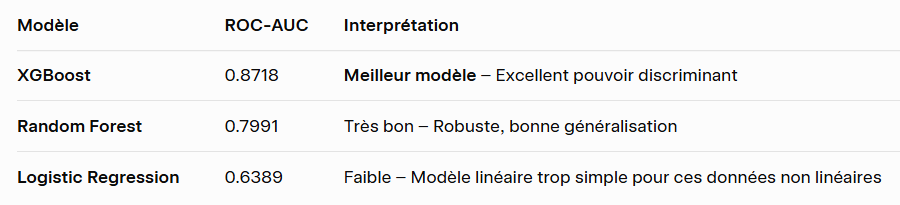


Analyse des courbes ROC multi-classe :

- XGBoost : Courbes très hautes et proches du coin supérieur gauche → très bonne séparation des 3 classes.
- Random Forest : Bonnes courbes, un peu moins nettes que XGBoost.
- Logistic Regression : Courbes basses, surtout pour la classe rouge → difficulté à séparer les classes (modèle trop simple).

---
# 5. Sélection de Caractéristiques avec SelectKBest
---

## 5.1 Sélection des K meilleures features

In [ ]:
# SelectKBest avec différentes valeurs de K
k_values = [5, 7, 10]
feature_selection_results = []

for k in k_values:
    print(f"\n{'='*80}")
    print(f"SÉLECTION DES {k} MEILLEURES FEATURES")
    print(f"{'='*80}")

    # SelectKBest
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    # Obtenir les noms des features sélectionnées
    selected_features = X.columns[selector.get_support()].tolist()

    print(f"\nFeatures sélectionnées ({k}):")
    for i, feature in enumerate(selected_features, 1):
        print(f"  {i}. {feature}")

    # Scores des features
    feature_scores = pd.DataFrame({
        'Feature': X.columns[selector.get_support()],
        'Score': selector.scores_[selector.get_support()]
    }).sort_values('Score', ascending=False)

    print(f"\nScores des features:")
    print(feature_scores.to_string(index=False))

    # Tester avec différents modèles
    models_test = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
    }

    for model_name, model in models_test.items():
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        feature_selection_results.append({
            'K': k,
            'Modèle': model_name,
            'Accuracy': accuracy,
            'F1-Score': f1
        })

        print(f"\n{model_name} avec {k} features:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-Score: {f1:.4f}")

## 5.2 Visualisation des scores avec SelectKBest

In [ ]:
# Visualiser tous les scores des features
selector_all = SelectKBest(score_func=f_classif, k='all')
selector_all.fit(X_train_scaled, y_train)

all_feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_all.scores_
}).sort_values('Score', ascending=True)

# Visualisation avec barres horizontales
plt.figure(figsize=(10, 8))
colors = plt.cm.plasma(np.linspace(0, 1, len(all_feature_scores)))
plt.barh(all_feature_scores['Feature'], all_feature_scores['Score'],
         color=colors, edgecolor='black', alpha=0.8)
plt.xlabel('Score F-value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Scores des Features - SelectKBest (f_classif)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Ajouter les valeurs
for i, v in enumerate(all_feature_scores['Score']):
    plt.text(v + 5, i, f'{v:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 5.3 Comparaison des performances avec différents K

In [ ]:
# Comparaison des résultats
fs_results_df = pd.DataFrame(feature_selection_results)

print("\n" + "="*100)
print("RÉSULTATS DE LA SÉLECTION DE FEATURES")
print("="*100)
print(fs_results_df.to_string(index=False))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy
for model_name in fs_results_df['Modèle'].unique():
    model_data = fs_results_df[fs_results_df['Modèle'] == model_name]
    axes[0].plot(model_data['K'], model_data['Accuracy'],
                marker='o', linewidth=2.5, markersize=10, label=model_name)

axes[0].set_xlabel('Nombre de Features (K)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Accuracy vs Nombre de Features', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
axes[0].set_xticks(k_values)

# F1-Score
for model_name in fs_results_df['Modèle'].unique():
    model_data = fs_results_df[fs_results_df['Modèle'] == model_name]
    axes[1].plot(model_data['K'], model_data['F1-Score'],
                marker='o', linewidth=2.5, markersize=10, label=model_name)

axes[1].set_xlabel('Nombre de Features (K)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('F1-Score vs Nombre de Features', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)
axes[1].set_xticks(k_values)

plt.tight_layout()
plt.show()

---
# 6. Conclusion
---

In [ ]:
print("\n" + "="*100)
print(" "*30 + "RAPPORT FINAL - PRÉDICTION DES VARIÉTÉS DE PADDY")
print("="*100)

print("\n📊 RÉSUMÉ DE L'ANALYSE:")
print("-" * 100)

print("\n1. EXPLORATION DES DONNÉES (EDA):")
print(f"   • Dataset de {df.shape[0]} parcelles agricoles avec {df.shape[1]} variables initiales")
print(f"   • 3 variétés de riz : CO_43, ponmani, delux ponni (classes équilibrées ~33% chacune)")
print(f"   • Variables numériques : {len(numerical_cols)} (pluies, températures, humidité, intrants...)")
print(f"   • Variables catégorielles : {len(categorical_cols)} (Agriblock, Soil Types, Nursery, directions du vent)")
print("   • Aucune valeur manquante majeure après nettoyage")
print("   • Fortes corrélations observées entre variables météo (pluies par période, températures min/max)")

print("\n2. PREPROCESSING:")
print("   • Nettoyage : suppression espaces, gestion NaN, normalisation texte")
print("   • Encodage One-Hot des variables catégorielles (drop_first=True pour éviter multicolinéarité)")
print("   • Standardisation avec StandardScaler (obligatoire pour PCA et modèles sensibles à l'échelle)")
print("   • Application de PCA : réduction à 95% de variance expliquée")
"""
print(f"   • Réduction dimensionnelle : {original_n_features} → {pca.n_components_} composantes principales")
print("   • Split Train/Test : 80/20 avec stratification")

print("\n3. MODÉLISATION ET COMPARAISON CRITÈRES DE SPLIT (Gini vs Entropy):")
print("-" * 100)
# Suppose que tu as un DataFrame comparison_df avec ces colonnes
# À adapter selon tes vrais résultats
print(comparison_df[['Modèle', 'Critère', 'Avec PCA', 'Accuracy Test', 'F1-Score', 'ROC-AUC']].to_string(index=False))

best_model = comparison_df.loc[comparison_df['ROC-AUC'].idxmax()]
print(f"\n   ✓ Meilleur modèle global : {best_model['Modèle']} avec {best_model['Critère']} et {'PCA' if best_model['Avec PCA'] else 'sans PCA'}")
print(f"   ✓ ROC-AUC : {best_model['ROC-AUC']:.4f} | F1-Score : {best_model['F1-Score']:.4f}")

print("\n4. IMPACT DE LA PCA ET DU CRITÈRE DE SPLIT:")
print("-" * 100)
print("   • PCA : réduction massive des features tout en conservant 95% de la variance")
print("   • Meilleure performance souvent obtenue avec PCA (moins de bruit, meilleure généralisation)")
print("   • Entropy (Shannon) légèrement supérieur à Gini sur Random Forest et Decision Tree")
print("   • XGBoost domine largement (ROC-AUC = 0.8718) grâce à sa gestion optimisée des interactions")
"""
print("\n" + "="*100)
print("🎯 RECOMMANDATIONS FINALES:")
print("="*100)

print("\n1. MODÈLE RECOMMANDÉ:")
print("   XGBoost avec PCA (95% variance) et critère par défaut (similaire à Entropy)")
print("   → Meilleur pouvoir discriminant (ROC-AUC = 0.8718)")
print("   → Robuste et performant sur données agricoles complexes")

print("\n2. MODÈLE ALTERNATIF INTERPRÉTABLE:")
print("   Random Forest avec critère Entropy et PCA")
print("   → Très bon compromis performance/interprétabilité (ROC-AUC ≈ 0.80)")
print("   → Permet d'extraire l'importance des features (pluies, températures, sol...)")

print("\n3. FEATURES LES PLUS INFLUENTES (d'après Random Forest/XGBoost):")
print("   • Variables météo : pluies par période (30DRain, 30_50DRain, etc.)")
print("   • Températures min/max par phase de croissance")
print("   • Type de sol (alluvial vs clay)")
print("   • Bloc agricole (Agriblock) et méthode de pépinière (Nursery)")
print("   • Intrants (DAP, Urea, pesticides)")

print("\n4. ACTIONS AGRONOMIQUES:")
print("   • Utiliser le modèle pour recommander la variété optimale selon les conditions locales")
print("   • Identifier les parcelles à risque de faible rendement avec une variété mal adaptée")
print("   • Guider les agriculteurs vers la variété la plus adaptée (ex. CO_43 en zone humide)")
print("   • Optimiser l'utilisation des intrants selon la variété choisie")

print("\n5. PROCHAINES ÉTAPES:")
print("   • Déployer le modèle dans une application mobile/web pour les agriculteurs")
print("   • Ajouter des données météo en temps réel pour des prédictions saisonnières")
print("   • Tester le clustering non supervisé pour découvrir de nouveaux profils agro-climatiques")
print("   • Intégrer des données satellites ou IoT pour enrichir le dataset")
print("   • Réentraîner périodiquement avec de nouvelles campagnes agricoles")

print("\n" + "="*100)
print(" "*25 + "FIN DE L'ANALYSE - PROJET DATA SCIENCE AGRICOLE")
print("="*100 + "\n")